# I. Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# II. Khám phá dữ liệu

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Data/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Data/test.csv")

Tổng hợp 2 file dữ liệu `train.csv` và `test.csv`

In [4]:
df=pd.concat([df_train,df_test])

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900


#### a) Kiểu dữ liệu của các cột

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<b>Nhận xét:</b> 
- Ở cột children, kiểu dữ liệu là dạng `numerical` nhưng thật ra cột này có kiểu `ordinal categorical` nên để cột này dạng `numerical` sẽ không có ảnh hưởng.
- Các cột còn lại không có gì bất thường.

#### b) Dữ liệu có bao nhiều dòng, cột

In [7]:
df.shape

(1338, 7)

In [8]:
df_train.shape

(1003, 7)

In [9]:
df_test.shape

(335, 7)

Nhận xét: Dữ liệu có 1338 dòng, 7 cột (trong đó 1003 dòng ở tập train, 335 dòng ở tập test).

#### c) Thống kê chi tiết của các cột có kiểu dữ liệu object

In [10]:
df.describe(include ="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### d) Thống kê chi tiết của các cột có kiểu dữ liệu số

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### e) Có cột nào có giá trị thiếu không?

In [12]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b>Nhận xét:</b> Không có cột nào bị thiếu dữ liệu.

#### f) Dữ liệu có dòng nào bị lặp hay không?

In [13]:
df.duplicated().sum()

1

<b>Nhận xét:</b> Có dòng bị lặp.

Xóa dòng bị lặp

In [14]:
df.drop_duplicates(inplace = True)

---

# III. Phân tích dữ liệu

### 1. Phân bố các trường dữ liệu

#### a) Trường dữ liệu dạng số

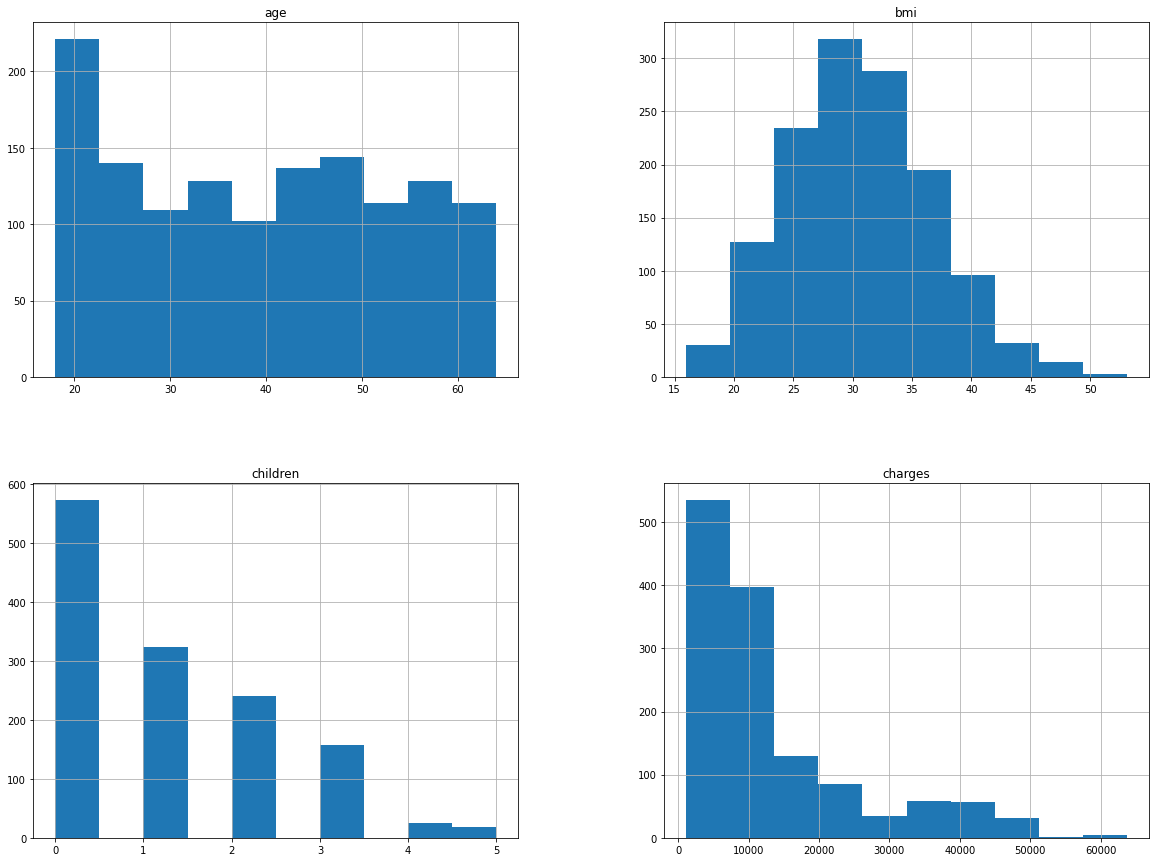

In [15]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

<b>Nhận xét:</b> 
- Ở cột age, độ tuổi từ 15-23 chiếm phần lớn (hơn 160).
- Ở cột BMI, chỉ số từ 27-31 chiếm phần lớn (gần 250).
- Ở cột Children, số người không có con chiếm phần lớn (hơn 400).
- Ở cột Charges, chi phí trong khoảng từ 1000-6000 chiếm phần lớn (gần 400).

#### b) Trường dữ liệu dạng object

<BarContainer object of 4 artists>

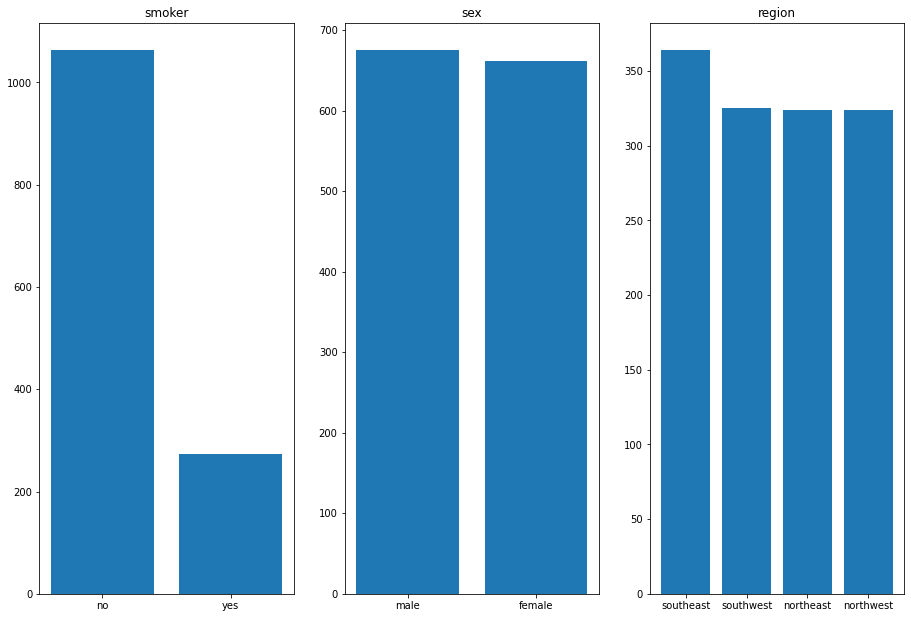

In [16]:
fig , axes = plt.subplots(1,3)
fig.set_size_inches(15.5, 10.5)
smoker_value_counts = df['smoker'].value_counts()
axes[0].bar(smoker_value_counts.index.tolist(), smoker_value_counts)
axes[0].set_title("smoker")
sex_value_counts = df['sex'].value_counts()
axes[1].set_title("sex")
axes[1].bar(sex_value_counts.index.tolist(), sex_value_counts)
region_value_counts = df['region'].value_counts()
axes[2].set_title("region")
axes[2].bar(region_value_counts.index.tolist(), region_value_counts)

<b>Nhận xét:</b> 
- Ở cột Smoker dữ liệu bị lệch, số lượng người không hút thuốc chiếm nhiều hơn số lượng người hút thuốc (chênh lệch khoảng 600).
- Ở cột Sex và Region dữ liệu phân bố tương đối ở các giá trị.

### 2. Mối tương quan giữa các trường dữ liệu.

#### a) Mối tương quan giữa các thuộc tính dạng Numerical với Charges.

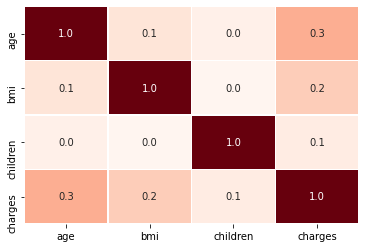

In [17]:
sns.heatmap(df.corr(), linewidths=.5, cmap='Reds', fmt='.1f', annot=True, 
            cbar=False)

<b>Nhận xét:</b> 
- Age và Charges, BMI và Charges, Children và Charges có mối tương quan thuận nhưng không mạnh (chỉ 0.3, 0.2 và 0.1)
- BMI và Children không có mối tương quan (chỉ số Correlation = 0).

<b>Vẽ biểu đồ giữa Age và Charges, BMI và Charges, Children và Charges để thấy mối tương quan thuận. </b>

- Biểu đồ thể hiện mối quan hệ giữa Age và Charges

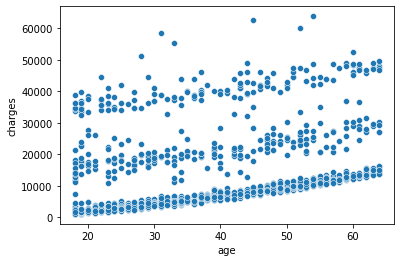

In [18]:
sns.scatterplot(x=df['age'],y = df['charges'])

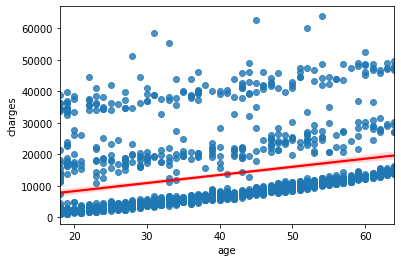

In [19]:
sns.regplot(x=df['age'],y=df['charges'], line_kws={"color": "red"})

- Biểu đồ thể hiện mối quan hệ giữa BMI và Charges.

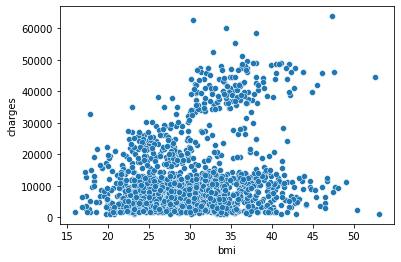

In [20]:
sns.scatterplot(x=df['bmi'],y = df['charges'])

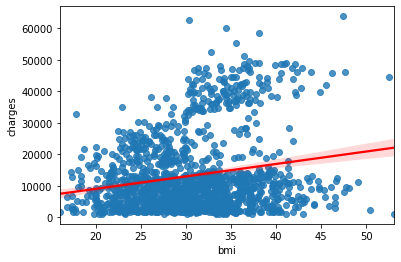

In [21]:
sns.regplot(x=df['bmi'],y=df['charges'],  line_kws={"color": "red"})

- Biểu đồ thể hiện mối quan hệ giữa Children và Charges.

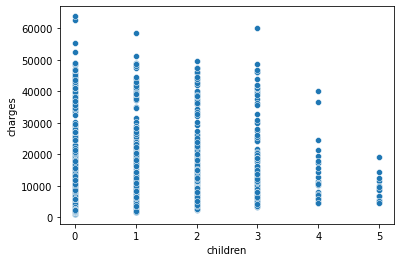

In [22]:
sns.scatterplot(x=df['children'],y = df['charges'])

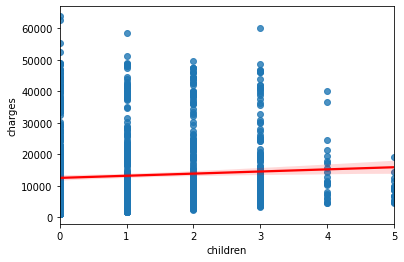

In [23]:
sns.regplot(x=df['children'],y = df['charges'], line_kws={"color": "red"})

#### b) Mối tương quan giữa các thuộc tính Catergorical với Charges.

<b>Vẽ biểu đồ thể hiện mối quan hệ giữa Smoker và Charges.</b>

- Biểu đồ thể hiện sự phân bố của Smoker và Charges.

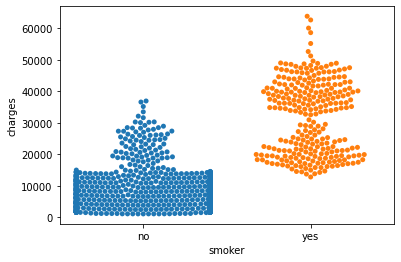

In [24]:
sns.swarmplot(x=df['smoker'],y = df['charges'])

- Biểu đồ thể hiện giá trị trung bình của Charges với từng giá trị của thuộc tính trong Smoker.

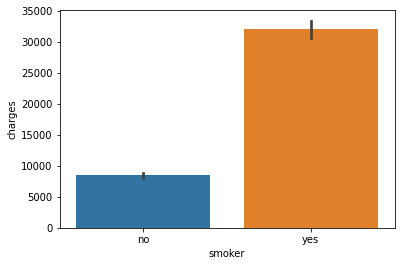

In [25]:
sns.barplot(x=df['smoker'],y = df['charges'])

Tính giá trị trung bình trong biểu đồ.

In [26]:
df.groupby(df["smoker"])["charges"].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

<b>Nhận xét:</b> 
- Những người hút thuốc sẽ có chi phí y tế cao hơn những người không hút thuốc.
- Nhìn biểu đồ giá trị trung bình ta có thể thấy độ chênh lệch này là rất nhiều (khoảng hơn 20000).

Vậy `Smoker`có ý nghĩa rất quan trọng trong việc dự đoán `Charges`.

<b>Vẽ biểu đồ thể hiện mối quan hệ giữa Region và Charges.</b>

- Biểu đồ thể hiện sự phân bố của Region và Charges.

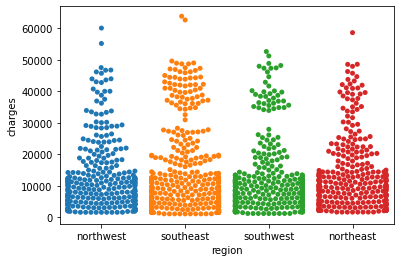

In [27]:
sns.swarmplot(x=df['region'],y = df['charges'])

- Biểu đồ thể hiện giá trị trung bình của Charges với từng giá trị của thuộc tính trong Region.

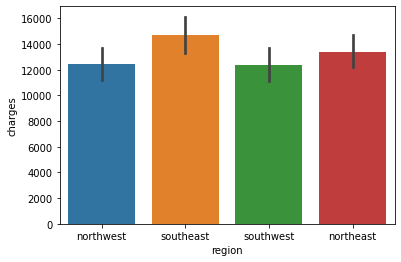

In [28]:
sns.barplot(x=df['region'],y = df['charges'])

Tính giá trị trung bình trong biểu đồ.

In [29]:
df.groupby(df["region"])["charges"].mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<b>Nhận xét:</b> 
- Những người ở vùng Đông Nam sẽ có chi phí y tế cao hơn tuy không nhiều.
- Độ chênh lệch giữa các vùng với nhau không nhiều, gần như tương đương nhau.

<b>Vẽ biểu đồ thể hiện mối quan hệ giữa Sex và Charges.</b>

- Biểu đồ thể hiện sự phân bố của Sex và Charges.

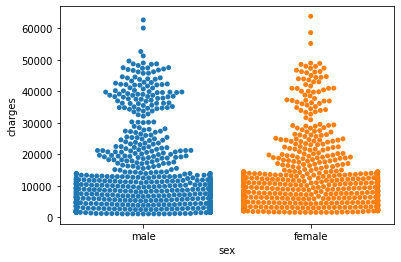

In [30]:
sns.swarmplot(x=df['sex'],y = df['charges'] )

- Biểu đồ thể hiện giá trị trung bình của Charges với từng giá trị của thuộc tính trong Sex.

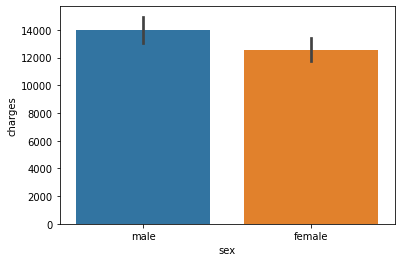

In [31]:
sns.barplot(x=df['sex'],y = df['charges'])

Tính giá trị trung bình trong biểu đồ.

In [32]:
df.groupby(df["sex"])["charges"].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

<b>Nhận xét:</b> 
- Những người nam sẽ có chi phí y tế cao hơn tuy không nhiều.
- Độ chênh lệch chi phí y tế giữa giới tính không nhiều, gần như tương đương nhau. 

<b>Vẽ biểu đồ thể hiện mối quan hệ giữa Children và Charges.</b>

Giải thích: Dù Children có kiểu dữ liệu là `numerical` nhưng thật ra `ordinal categorical` vì vậy ta có thể đưa trong phần này để thấy rõ hơn.

- Biểu đồ thể hiện sự phân bố của Children và Charges.

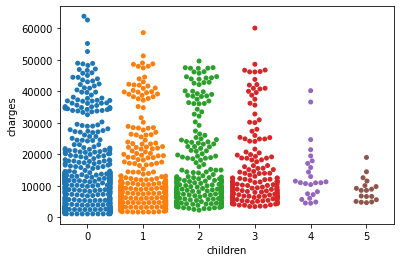

In [33]:
sns.swarmplot(x=df['children'],y = df['charges'] )

- Biểu đồ thể hiện giá trị trung bình của Charges với từng giá trị của thuộc tính trong Children.

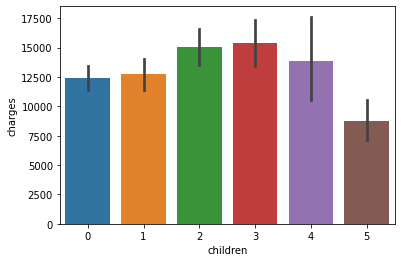

In [34]:
sns.barplot(x=df['children'],y = df['charges'])

Tính giá trị trung bình trong biểu đồ.

In [35]:
df.groupby(df["children"])["charges"].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

<b>Nhận xét:</b> 
- Những người có 2-3 con có chi phí dịch vụ cao hơn những người khác.
- Những người có 5 con có chi phí dịch vụ thấp nhất.

#### c) So sánh tỉ lệ hút thuốc và không hút thuốc với từng Sex, Region, AgeGroup, BMIGroup.

Giải thích: Vì Smoker có ảnh hưởng lớn đến Charges nên ta sẽ khảo sát thử mối quan hệ giữa nó với các thuộc tính khác trong dữ liệu.

-  Tỉ lệ hút thuốc và không hút thuốc ở từng giới tính.

[Text(0.5, 1.0, 'Smoker vs Sex')]

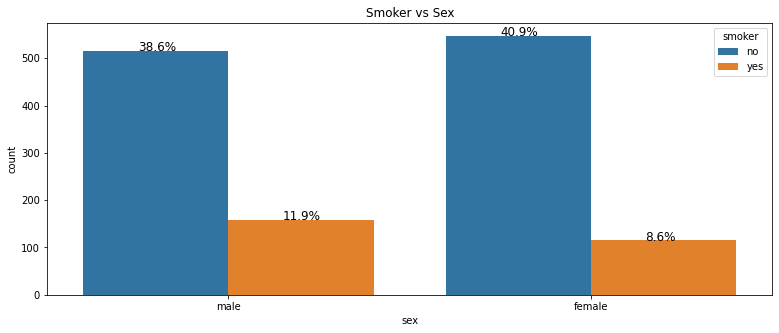

In [36]:
def bar_perc(plot, feature):
    total = len(feature) 
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()          
        plot.annotate(percentage, (x, y), size = 12) 
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='smoker',data=df)
bar_perc(ax,df['smoker'])
ax.set(title="Smoker vs Sex")

<b>Nhận xét:</b> 
- Vì số lượng nam và nữ ở tập dữ liệu gần như nhau, nên ta thấy là nam hút thuốc nhiều hơn nữ.
- Ở nam giới, tỉ lệ nam giới hút thuốc gần 30%, còn nữ giới hút thuốc gần 20%. Như vậy là tương đối cao.

-  Tỉ lệ hút thuốc và không hút thuốc ở từng vùng miền.

[Text(0.5, 1.0, 'Smoker vs Region')]

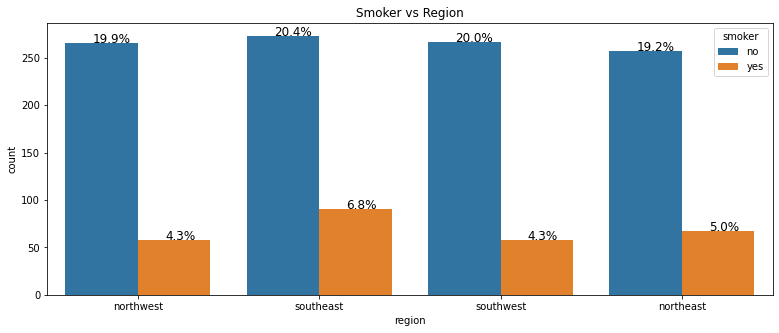

In [37]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=df)
bar_perc(ax,df['smoker'])
ax.set(title="Smoker vs Region")

<b>Nhận xét:</b> 
- Tỉ lệ giữ người không hút thuốc giữa các vùng khá đồng đều.
- Vùng Đông Nam có lượng người hút thuốc đông nhất.

### 3. Xét các điểm dữ liệu nhiễu

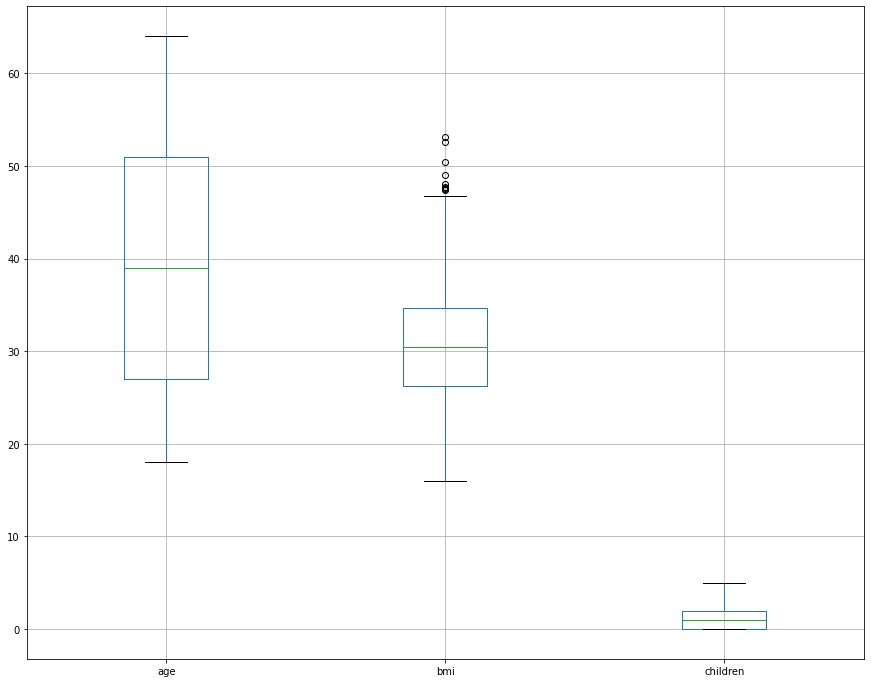

In [38]:
temp_df = df.drop("charges", axis=1)
temp_df.boxplot(figsize=(15, 12))

Ở cột `bmi` có giá trị nhiễu

In [39]:
q1,q2,q3 = temp_df['bmi'].quantile([0.25,0.5,0.75])
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
upper_limit

47.31500000000001

Nhận xét: Ở cột `bmi` những giá trị lớn hơn 47.351 là dữ liệu nhiễu. Ta cần tiền xử lý.

---

# IV. Tiền xử lý dữ liệu

In [40]:
y_sr = df_train["charges"] # sr là viết tắt của series
X_df = df_train.drop("charges", axis=1)

In [41]:
X_df

,age,sex,bmi,children,smoker,region
0,24,male,23.655,0,no,northwest
1,28,female,26.510,2,no,southeast
2,51,male,39.700,1,no,southwest
3,47,male,36.080,1,yes,southeast
4,46,female,28.900,2,no,southwest
...,...,...,...,...,...,...
998,18,female,31.350,4,no,northeast
999,39,female,23.870,5,no,southeast
1000,58,male,25.175,0,no,northeast
1001,37,female,47.600,2,yes,southwest


In [42]:
y_sr

0        2352.96845
1        4340.44090
2        9391.34600
3       42211.13820
4        8823.27900
           ...     
998      4561.18850
999      8582.30230
1000    11931.12525
1001    46113.51100
1002    10214.63600
Name: charges, Length: 1003, dtype: float64

- Kiểm định mối quan hệ giữa các cột trong dữ liệu bằng thống kê.

Để có thể kiểm định bằng thống kê, ta phải chuẩn hóa các cột `categorcial` thành `numerical` bằng phương pháp OneHotEncoder.

In [43]:
new_df = df.copy()
new_df = pd.get_dummies(new_df, columns=["smoker", "sex","region"])
new_df.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,24,23.655,0,2352.96845,1,0,0,1,0,1,0,0
1,28,26.510,2,4340.44090,1,0,1,0,0,0,1,0
2,51,39.700,1,9391.34600,1,0,0,1,0,0,0,1
3,47,36.080,1,42211.13820,0,1,0,1,0,0,1,0
4,46,28.900,2,8823.27900,1,0,1,0,0,0,0,1


In [44]:
y = new_df["charges"]
x = new_df.drop("charges", axis=1)

In [45]:
results = sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        13:45:51   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -295.0121    430.721  

*Với mức ý nghĩa là 0.05*, ta có:
- Ở phần sex, region có p-value > 0.05, nghĩa là sex và region không có ảnh hưởng đến chi phí y tế. Vì vậy, ta có thể loại bỏ 2 cột này.
- Ở phần age, bmi, smoker, children có p-value < 0.05, nghĩa là có ảnh hưởng đến chi phí y tế. Vì vậy ta giữ nguyên 4 cột này.

- Xóa bỏ cột `sex` và `region`.

In [46]:
X_df = X_df.drop(["sex","region"],axis=1)
X_df

,age,bmi,children,smoker
0,24,23.655,0,no
1,28,26.510,2,no
2,51,39.700,1,no
3,47,36.080,1,yes
4,46,28.900,2,no
...,...,...,...,...
998,18,31.350,4,no
999,39,23.870,5,no
1000,58,25.175,0,no
1001,37,47.600,2,yes


- Thay thế những giá trị nhiễu (lớn hơn upper_limit) ở cột `bmi` bằng giá trị mean của cột.

In [47]:
X_df[X_df["bmi"]>upper_limit]["bmi"] = X_df["bmi"].mean()

- Tạo pipeline cho quá trình tiền xử lý dữ liệu

In [48]:
X_df["smoker"] = X_df["smoker"].astype(str)

one_hot_encoder = OneHotEncoder()
standar_scaler = StandardScaler()
cols_numerical = ["age", "bmi", "children"]
cols_categorical = ["smoker"]

column_trans =  ColumnTransformer([("cols_numerical", standar_scaler, cols_numerical),
                                   ("cols_categorical", one_hot_encoder, cols_categorical)])

---

# V. Mô hình hóa dữ liệu

### 1. Linear Regression

a) Xây dựng model

In [49]:
linear_regression = LinearRegression()
linear_pipeline = Pipeline([('column_trans', column_trans),
                            ('linear_regression', linear_regression)])

b) Huấn luyện model

In [50]:
linear_pipeline.fit(X_df, y_sr)

Pipeline(memory=None,
         steps=[('column_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cols_numerical',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('cols_categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                     

$$y = w_0 + w_1*x_1 + w_2*x_2+w_3*x_3+w_4*x_4 + w_5*x_5$$

Hệ số chặn $w_0$

In [51]:
linear_pipeline.named_steps['linear_regression'].intercept_

20230.493264917626

Hệ số $w_i$ với $i$ từ 1-4

In [52]:
linear_pipeline.named_steps['linear_regression'].coef_

array([  3648.466473  ,   1968.78192674,    524.0369871 , -11816.31999987,
        11816.31999987])

c) Độ chính xác trên tập huấn luyện

In [53]:
def compute_mse(y, preds):
        return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)

In [54]:
baseline_preds = y_sr.mean()
print(f"Score: {compute_rr(y_sr, linear_pipeline.predict(X_df), baseline_preds)}")

Score: 0.7441585658576718


### 2. Neural Network

a) Xây dựng model với từng siêu tham số

In [55]:
mlp_regr = MLPRegressor(random_state=1, max_iter=2500, solver = "lbfgs")
param_grid_mlp = { 
    "alpha": [0.05, 0.1, 1],
    'hidden_layer_sizes': [(80,),(100,),(100,2)]
}

CV_mlp = GridSearchCV(estimator=mlp_regr, param_grid=param_grid_mlp)
CV_mlp_pipeline=Pipeline([('column_trans',column_trans),
                        ('MLPRegressor',CV_mlp)])

b) Huấn luyện model với siêu tham số cho kết quả tốt nhất.

In [56]:
CV_mlp_pipeline.fit(X_df, y_sr)

Pipeline(memory=None,
         steps=[('column_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cols_numerical',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('cols_categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                     

Siêu tham số tốt nhất

In [57]:
CV_mlp.best_params_

{'alpha': 0.05, 'hidden_layer_sizes': (80,)}

c) Độ chính xác trên tập huấn luyện

In [58]:
baseline_preds = y_sr.mean()
print(f"Score: {compute_rr(y_sr, CV_mlp_pipeline.predict(X_df), baseline_preds)}")

Score: 0.8891041487308955


### 3. Random Forest Regressor

a) Xây dựng model với từng siêu tham số

In [59]:
param_grid_rdd = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
}
rfr=RandomForestRegressor(random_state=1, n_jobs=-1)

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rdd)
CV_rfr_pipeline=Pipeline([('column_trans',column_trans),
                             ('randomforest',CV_rfr)])

b) Huấn luyện model với siêu tham số cho kết quả tốt nhất.

In [60]:
CV_rfr_pipeline.fit(X_df,y_sr)

Pipeline(memory=None,
         steps=[('column_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cols_numerical',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('cols_categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                     

Siêu tham số tốt nhất

In [61]:
CV_rfr.best_params_

{'max_depth': 4, 'n_estimators': 200}

c) Độ chính xác trên tập huấn luyện

In [62]:
baseline_preds = y_sr.mean()
print(f"Score: {compute_rr(y_sr, CV_rfr_pipeline.predict(X_df), baseline_preds)}")

Score: 0.8756666079774867


---

# VI. Kiểm tra mô hình vừa huấn luyện

In [63]:
path_test = '/content/drive/MyDrive/Data/test.csv'
df_test = pd.read_csv(path_test)

In [64]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,45,female,25.175,2,no,northeast,9095.06825
1,36,female,30.020,0,no,northwest,5272.17580
2,64,female,26.885,0,yes,northwest,29330.98315
3,46,male,25.745,3,no,northwest,9301.89355
4,19,male,31.920,0,yes,northwest,33750.29180


Xóa cột Sex và Region như phần tập dữ liệu train.

In [65]:
test_y = df_test["charges"]
test_X = df_test.drop("charges", axis=1)
test_X = test_X.drop(["sex","region"],axis=1)

In [66]:
baseline_preds = test_y.mean()

### 1. Linear Regression

In [67]:
print(f"Score: {compute_rr(test_y, linear_pipeline.predict(test_X), baseline_preds)}")

Score: 0.7653688584061046


### 2. Neural network

In [68]:
print(f"Score: {compute_rr(test_y, CV_mlp_pipeline.predict(test_X), baseline_preds)}")

Score: 0.8608271610360096


### 3. Random Forest Regression

In [69]:
print(f"Score: {compute_rr(test_y, CV_rfr_pipeline.predict(test_X), baseline_preds)}")

Score: 0.8581463981930906
